<a href="https://colab.research.google.com/github/Karry4you143/Pytorch-tutorial-youtube/blob/main/Copy_of_simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.youtube.com/watch?v=Xp0LtPBcos0
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#Create a model class that inherits nn.module
#In the `__init__` method of your `Model` class, the parameters `in_features`,
#`h1`, `h2`, and `out_features` define the structure of the neural network. Here's what each of them means:
#1. **`in_features`**:
#   - This parameter specifies the number of input features to the neural
#     network. For example, if you have a dataset where each input example is
#     represented by a vector of 4 features, you would set `in_features=4`.
#     This is the size of the input layer.
#2. **`h1`**:
#   - This parameter defines the number of neurons (units) in the first hidden
#     layer. In this case, `h1=8` means the first hidden layer will have 8 neurons.
#3. **`h2`**:
#   - This parameter defines the number of neurons in the second hidden layer.
#     Here, `h2=9` means the second hidden layer will have 9 neurons.
#4. **`out_features`**:
#   - This parameter specifies the number of output features from the neural
#     network. If you're solving a classification problem with 3 classes,
#     you would set `out_features=3`, which is the size of the output layer.
# The output layer will produce a vector of size 3, corresponding to the three
# possible classes.
#In summary, these parameters control the size of each layer in the neural network:
#- `in_features` corresponds to the input layer.
#- `h1` and `h2` correspond to the first and second hidden layers, respectively.
#- `out_features` corresponds to the output layer.
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        # Initialize the first fully connected layer with input features and first hidden layer size
        self.fc1 = nn.Linear(in_features, h1)

        # Initialize the second fully connected layer with the first and second hidden layer sizes
        self.fc2 = nn.Linear(h1, h2)

        # Initialize the output layer with the second hidden layer size and output features
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        # Pass the input through the first layer and apply ReLU activation function
        x = F.relu(self.fc1(x))

        # Pass the result through the second layer and apply ReLU activation function
        x = F.relu(self.fc2(x))

        # Pass the result through the output layer (no activation function)
        x = self.out(x)

        # Return the final output
        return x

In [ ]:
torch.manual_seed(41)
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [ ]:
#Change last column from strings to integers
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

my_df = pd.read_csv(url)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
my_df['variety'] = my_df['variety'].map({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})

In [ ]:
x = my_df.drop('variety', axis=1).values
y = my_df['variety'].values

In [ ]:
import torch

x = torch.from_numpy(x)
y = torch.from_numpy(y)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=41)

In [ ]:
x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

<ipython-input-65-aefd9c66697f>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype=torch.float32)
<ipython-input-65-aefd9c66697f>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test, dtype=torch.float32)
<ipython-input-65-aefd9c66697f>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
<ipython-input-65-aefd9c66697f>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTe

In [ ]:
#Set the criterion of the model to measure the error
criterion = nn.CrossEntropyLoss()
#Choose Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
model.parameters()

<generator object Module.parameters at 0x7a2de67a7e60>

epoch 0, loss 1.1271402835845947
epoch 10, loss 1.0097346305847168
epoch 20, loss 0.8131378889083862
epoch 30, loss 0.5763415098190308
epoch 40, loss 0.3895929157733917
epoch 50, loss 0.2617512047290802
epoch 60, loss 0.1752023547887802
epoch 70, loss 0.11824619024991989
epoch 80, loss 0.08286360651254654
epoch 90, loss 0.062110576778650284


Text(0.5, 0, 'epoch')

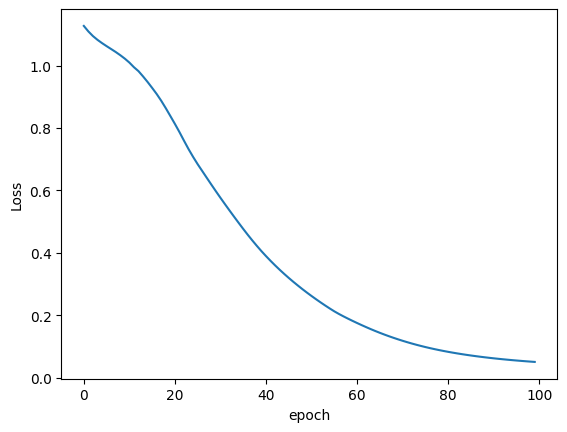

In [ ]:
#Train our model
epoch = 100
losses = []

for i in range(epoch):
    y_pred = model.forward(x_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 10 == 0:
        print('epoch {}, loss {}'.format(i, loss.item()))

plt.plot(range(epoch), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')


